## Part1: Data Processing

Import data processing packages

In [22]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

Load Dataset, Check information

In [23]:
# Import covid-19 Data Set
df = pd.read_csv(r"./mexico_covid19.csv")
# Show data types
df.info() 
df.head(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Age           263007 non-null  float64
 1   Sex           263007 non-null  float64
 2   Pneumonia     263008 non-null  object 
 3   Diabetes      263007 non-null  float64
 4   Ashma         263007 non-null  float64
 5   Hypertension  263007 non-null  float64
 6   CVDs          263007 non-null  float64
 7   Obesity       263007 non-null  float64
 8   CKDs          263007 non-null  float64
 9   Tabacco       263007 non-null  float64
 10  Result        263007 non-null  float64
dtypes: float64(10), object(1)
memory usage: 88.0+ MB


,Age,Sex,Pneumonia,Diabetes,Ashma,Hypertension,CVDs,Obesity,CKDs,Tabacco,Result
0,74.0,0.0,0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1,71.0,1.0,0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


#### Cleaning Dataset

In [24]:
# Since the selected columns need to have 0 and 1 value 
cols = ['Sex', 'Pneumonia', 'Diabetes', 'Ashma', 'Hypertension', 'CVDs', 'Obesity', 'CKDs', 'Tabacco', 'Result'] 
# Drop empty rows
df=df.dropna()
# Drop invalid rows (not in [0,1] range)
df[df.columns] = df[df.columns].astype('Int32')
for col in cols:
    df = df.loc[df[col] <=1]
    df = df.loc[df[col] >=0]
df.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 261409 entries, 0 to 263006
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype
---  ------        --------------   -----
 0   Age           261409 non-null  Int32
 1   Sex           261409 non-null  Int32
 2   Pneumonia     261409 non-null  Int32
 3   Diabetes      261409 non-null  Int32
 4   Ashma         261409 non-null  Int32
 5   Hypertension  261409 non-null  Int32
 6   CVDs          261409 non-null  Int32
 7   Obesity       261409 non-null  Int32
 8   CKDs          261409 non-null  Int32
 9   Tabacco       261409 non-null  Int32
 10  Result        261409 non-null  Int32
dtypes: Int32(11)
memory usage: 15.7 MB


In [25]:
# quick view for cleaning result:
df.describe()

,Age,Sex,Pneumonia,Diabetes,Ashma,Hypertension,CVDs,Obesity,CKDs,Tabacco,Result
count,261409.000000,261409.000000,261409.000000,261409.000000,261409.000000,261409.000000,261409.000000,261409.000000,261409.000000,261409.000000,261409.000000
mean,42.551626,0.490006,0.161012,0.129361,0.036311,0.168472,0.025802,0.166528,0.021793,0.090368,0.389233
std,16.894625,0.499901,0.367543,0.335599,0.187063,0.374285,0.158546,0.372555,0.146009,0.286709,0.487577
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,53.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,120.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [26]:
#Checking unique value in all the columns
pd.Series({c: df[c].unique() for c in df})

Age             [74, 71, 50, 25, 28, 67, 44, 62, 30, 32, 53, 3...
Sex                                                        [0, 1]
Pneumonia                                                  [0, 1]
Diabetes                                                   [1, 0]
Ashma                                                      [0, 1]
Hypertension                                               [1, 0]
CVDs                                                       [0, 1]
Obesity                                                    [1, 0]
CKDs                                                       [0, 1]
Tabacco                                                    [0, 1]
Result                                                     [0, 1]
dtype: object

In [27]:
# A quick view for the covid rate
df["Result"].describe()

count    261409.000000
mean          0.389233
std           0.487577
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max           1.000000
Name: Result, dtype: float64

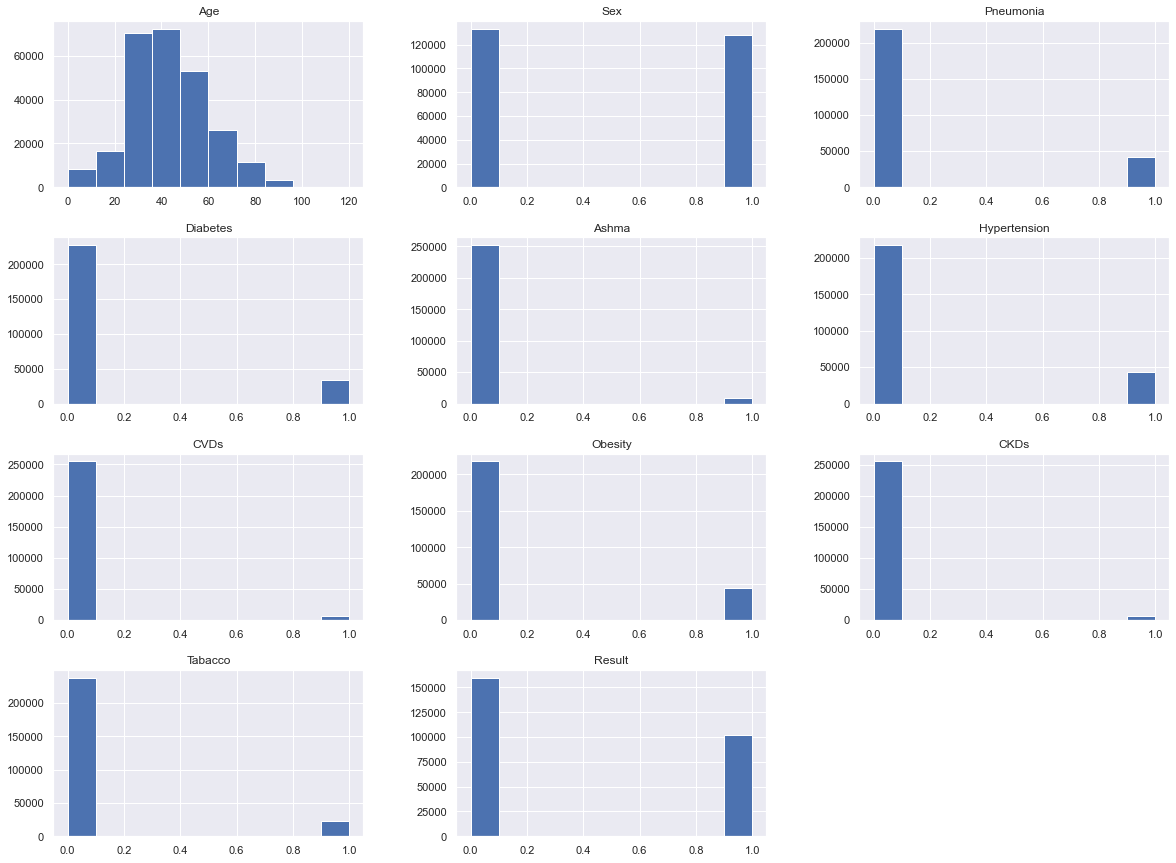

In [28]:
df.hist(figsize=(20,15),histtype='barstacked')
plt.show()

<AxesSubplot:xlabel='Tabacco', ylabel='Result'>

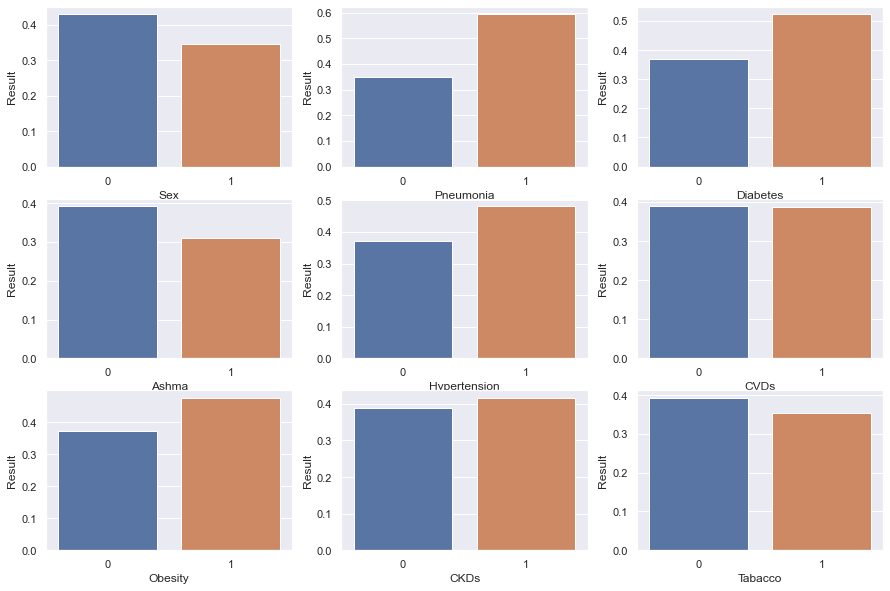

In [29]:
fig,ax_arr=plt.subplots(3,3,figsize=(15,10))
seaborn.barplot(df["Sex"],df['Result'],ci=None,ax=ax_arr[0][0])
seaborn.barplot(df["Pneumonia"],df['Result'],ci=None,ax=ax_arr[0][1])
seaborn.barplot(df["Diabetes"],df['Result'],ci=None,ax=ax_arr[0][2])
seaborn.barplot(df["Ashma"],df['Result'],ci=None,ax=ax_arr[1][0])
seaborn.barplot(df["Hypertension"],df['Result'],ci=None,ax=ax_arr[1][1])
seaborn.barplot(df["CVDs"],df['Result'],ci=None,ax=ax_arr[1][2])
seaborn.barplot(df["Obesity"],df['Result'],ci=None,ax=ax_arr[2][0])
seaborn.barplot(df["CKDs"],df['Result'],ci=None,ax=ax_arr[2][1])
seaborn.barplot(df["Tabacco"],df['Result'],ci=None,ax=ax_arr[2][2])

## Part2.1: Correlation: Fnding Most Vital Factors
In this part, we want to know which factors have the closest relation with covid result

<AxesSubplot:>

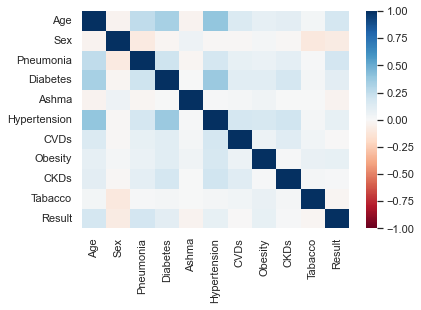

In [30]:
# Calculating pairwise correlation
corr = df.corr()
# Change the colormap to a divergent scale and fix the range of the colormap
seaborn.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, vmin=-1, vmax=1, cmap='RdBu')


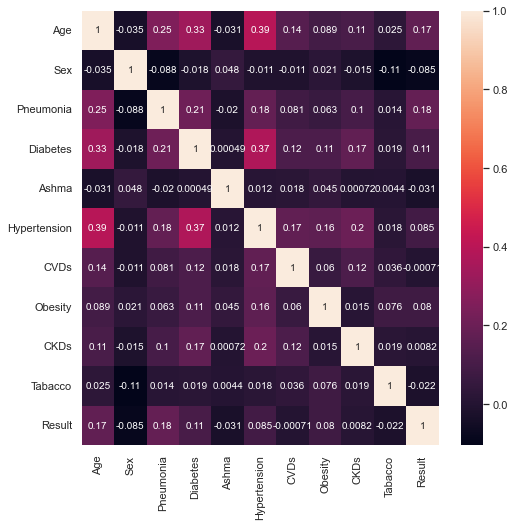

In [31]:
# A more detailed version heatamap
seaborn.heatmap(df.corr(),annot=True)
#---get a reference to the current figure and set its size---
fig = plt.gcf()
fig.set_size_inches(8,8)

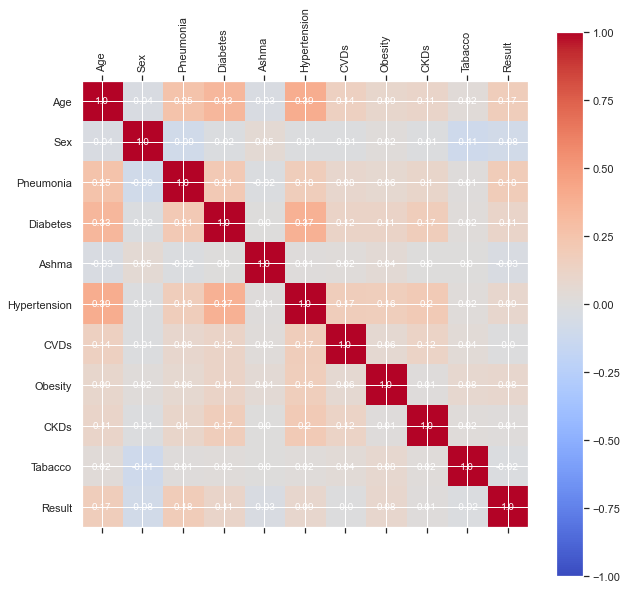

In [32]:
fig, ax = plt.subplots(figsize=(10, 10))
cax = ax.matshow(df.corr(),cmap='coolwarm', vmin=-1, vmax=1)

fig.colorbar(cax)
ticks = np.arange(0,len(df.columns),1)
ax.set_xticks(ticks)

ax.set_xticklabels(df.columns)
plt.xticks(rotation = 90)

ax.set_yticklabels(df.columns)
ax.set_yticks(ticks)

#---print the correlation factor---
for i in range(df.shape[1]):
    for j in range(11):
        text = ax.text(j, i, round(df.corr().iloc[i][j],2),
                       ha="center", va="center", color="w")
plt.show()

Sorted relation of factors to result

In [33]:
print(df.corr().nlargest(len(df.corr()), 'Result')['Result'])

Result          1.000000
Pneumonia       0.183649
Age             0.173145
Diabetes        0.105313
Hypertension    0.085278
Obesity         0.079561
CKDs            0.008197
CVDs           -0.000711
Tabacco        -0.022052
Ashma          -0.031356
Sex            -0.084965
Name: Result, dtype: float64


Pneumonia, Age and Diabetes are the most related 3

## Part2.2: Exploratory Data Analysis
This part is just a addtion for 2.1, we still target at finding the most covid-related factors

0    159660
1    101749
Name: Result, dtype: Int64
261409
patience with Negative Result: 61.08 %
patience with Positive Result: 38.92 %


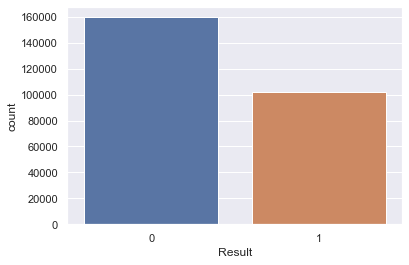

In [34]:
y = df["Result"]
seaborn.countplot(y)
Result_temp = df.Result.value_counts()
print(Result_temp)
print(len(df))
print("patience with Negative Result: "+str(round(Result_temp[0]*100/len(df),2)),"%")
print("patience with Positive Result: "+str(round(Result_temp[1]*100/len(df),2)),"%")

### Most related 3 factors:

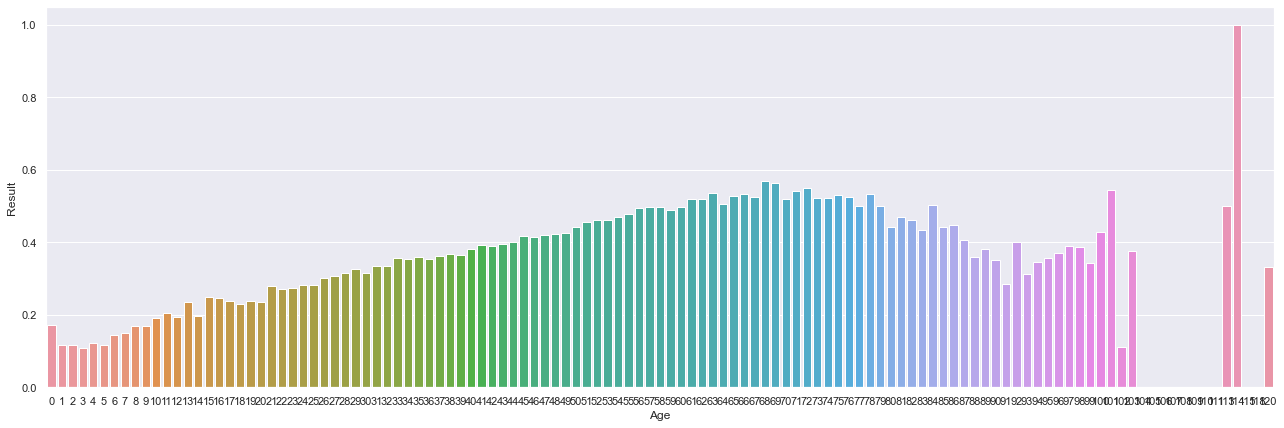

In [35]:
df["Age"].unique()
seaborn.set(rc={'figure.figsize':(22,7)})
seaborn.barplot(df["Age"],y,ci=None)
seaborn.set(rc={'figure.figsize':(11,7)})

<AxesSubplot:xlabel='Pneumonia', ylabel='Result'>

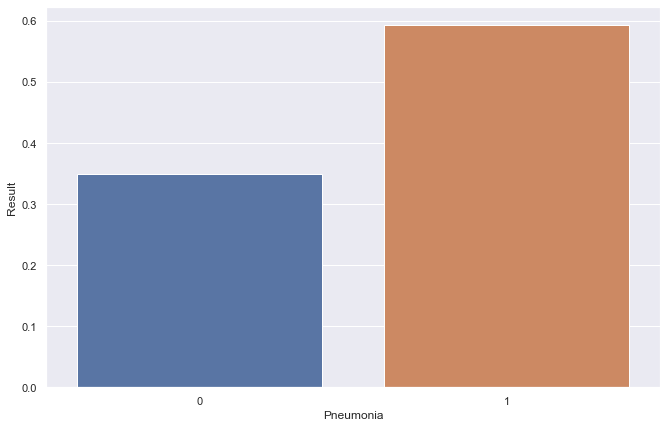

In [36]:
seaborn.barplot(df["Pneumonia"],y,ci=None)

<AxesSubplot:xlabel='Diabetes', ylabel='Result'>

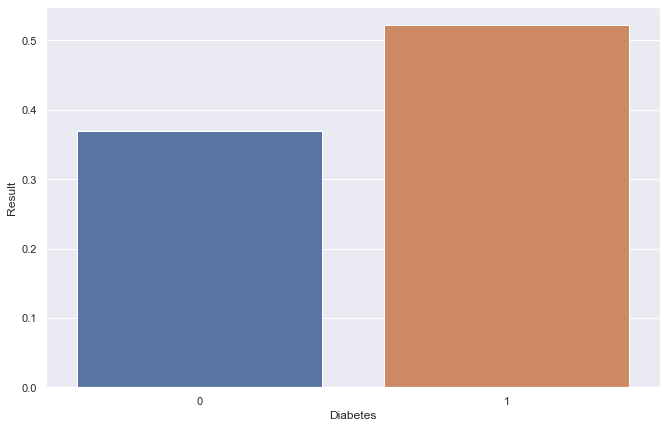

In [37]:
seaborn.barplot(df["Diabetes"],y,ci=None)

## Part3: Prediction
### 3.1: Data adjusting
Perform AI methods to predict  'Result'  from 'Age', 'Pneumonia' and 'Diabetes' 

In [38]:
selected_cols = ['Age', 'Pneumonia', 'Diabetes', 'Result']
dataset = df[selected_cols]
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# columns_to_scale = ['Age']
# dataset[columns_to_scale] = scaler.fit_transform(dataset[columns_to_scale])
# view columns
dataset.columns

Index(['Age', 'Pneumonia', 'Diabetes', 'Result'], dtype='object')

In [39]:
# dataset['Result'] = pd.get_dummies(df['Result'], drop_first=True)
dataset

,Age,Pneumonia,Diabetes,Result
0,74,0,1,0
1,71,0,1,0
2,50,1,0,1
3,25,0,0,1
4,28,0,0,0
...,...,...,...,...
263002,39,0,0,1
263003,53,1,1,1
263004,65,0,1,1
263005,71,1,0,1


#### Train Test Split and Model Fitting 

In [40]:
from sklearn.model_selection import train_test_split
X = dataset.drop(['Result'], axis = 1)
Y = dataset['Result']
# 30% splitting
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)
Y_train=Y_train.astype('int')
Y_test=Y_test.astype('int')
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# dataset['Age'] = scaler.fit_transform(dataset['Age'])
x_train = scaler.fit_transform(X_train)
x_test = scaler.transform(X_test)

In [41]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

(182986, 3)
(78423, 3)
(182986,)
(78423,)


### Method1: KNN (our version)

Got 45453 / 78423 correct => accuracy:0.579588
It took 1264.8614745140076 seconds.


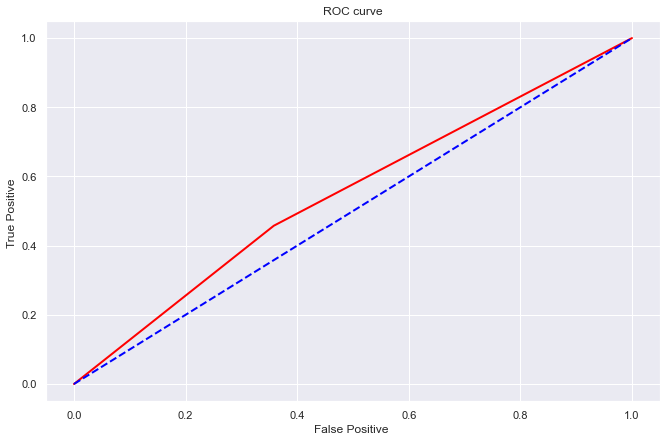

[[33329 14375]
 [18595 12124]]
              precision    recall  f1-score   support

           0       0.64      0.70      0.67     47704
           1       0.46      0.39      0.42     30719

    accuracy                           0.58     78423
   macro avg       0.55      0.55      0.55     78423
weighted avg       0.57      0.58      0.57     78423

Precision Score :  0.5795876209785394
Recall Score :  0.5795876209785394
0.5795876209785394


<AxesSubplot:xlabel='Diabetes'>

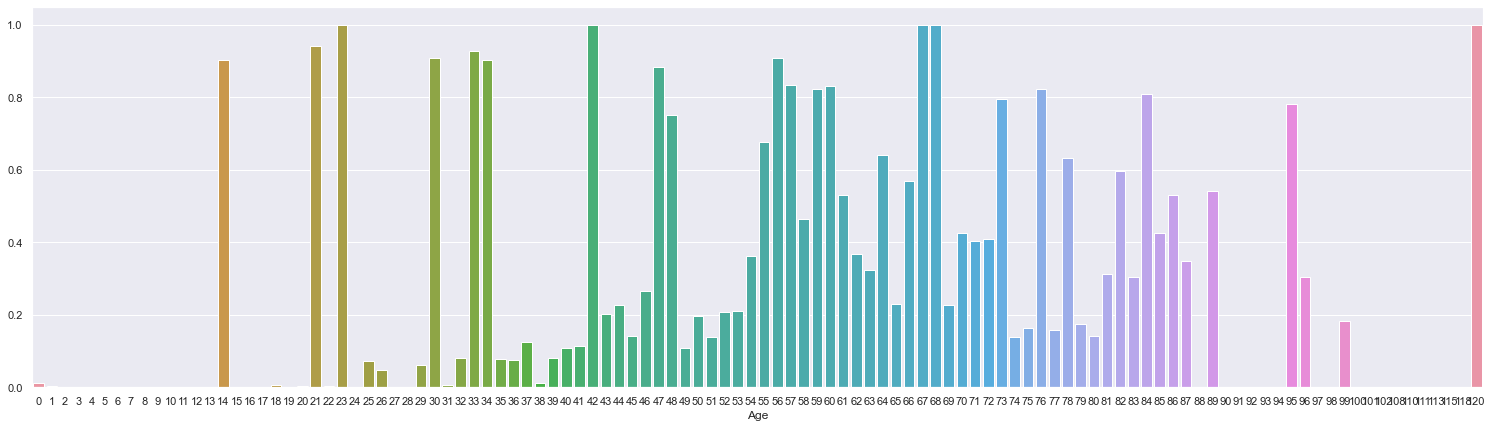

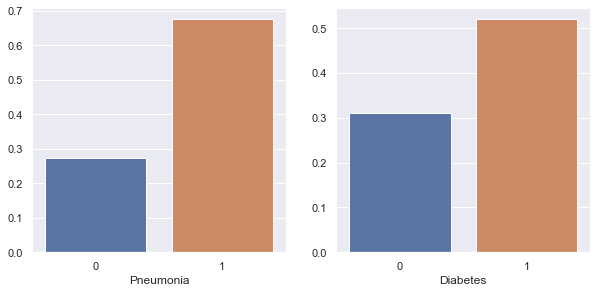

In [42]:
import numpy as np
import time
from sklearn.metrics import confusion_matrix, classification_report, precision_score,recall_score,f1_score
from sklearn.metrics import accuracy_score,roc_curve,roc_auc_score
class Knn:
    def __init__(self, train_data=None, train_targets=None, test_data=None, test_targets=None, dis='M', k=6):
        self.tr_d = train_data
        self.tr_t = train_targets 
        self.te_d = test_data
        self.te_t = test_targets
        self.dis = dis
        self.k = k  
        self.predict_result = None
        self.__initialized()

    def get_train_dataset(self, train_data, train_targets): 
        self.tr_d = train_data
        self.tr_t = train_targets
        self.__initialized()

    def get_test_dataset(self, test_data, test_targets, dis='M', k=6):
        self.te_t = test_data
        self.te_t = test_targets
        self.dis = dis
        self.k = k
        self.__initialized()

    def __initialized(self):
        base_data = [self.tr_d, self.tr_t, self.te_d, self.te_t]
        for i in range(len(base_data)):
            base_data[i] = np.array(base_data[i])
            if i in [0, 2]:
                base_data[i] = base_data[i].reshape(base_data[i].shape[0], -1) / 255
        self.tr_d, self.tr_t, self.te_d, self.te_t = base_data

    def predict(self): 
        num_test = len(self.te_d)
        result_list = []
        for i in range(num_test):
            if self.dis == 'E': 
                distances = np.sqrt(np.sum((self.tr_d - self.te_d[i]) ** 2, axis=1))
            elif self.dis == 'M':  # 曼哈顿距离
                distances = np.sum(np.abs(self.tr_d - self.te_d[i]), axis=1)
            else:
                print('parameter error."E"or"M"')
            nearest_k = np.argsort(distances) 
            nearest_k = nearest_k[:self.k]
            word_dic = {} 
            for i in nearest_k:
                word_dic[self.tr_t[i]] = word_dic.get(self.tr_t[i], 0) + 1
            sortedClassCount = sorted(word_dic.items(), key=lambda x: x[1], reverse=True)
            result_list.append(sortedClassCount[0][0])
        self.predict_result = np.array(result_list)
        return np.array(result_list) 

    def get_results(self):
        start = time.time()
        y_test_pred = self.predict()
        num_test = self.te_t.shape[0]
        num_correct = np.sum(y_test_pred == self.te_t)
        accuracy = float(num_correct) / num_test
        end = time.time()
        print('Got %d / %d correct => accuracy:%f' % (num_correct, num_test, accuracy))
        print('It took {} seconds.'.format(end - start))
        plt.figure()
        fpr, tpr,_=roc_curve(self.predict_result,Y_test,drop_intermediate=False)
        plt.plot(fpr, tpr, color='red',lw=2, label='ROC curve')
        plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
        plt.xlabel('False Positive ')
        plt.ylabel('True Positive ')
        plt.title('ROC curve')
        plt.show()
        roc_auc_score(y_test_pred,Y_test)
        return accuracy
a = Knn(x_train,Y_train,x_test,Y_test)
accu_knn_our=a.get_results()
cm = confusion_matrix(Y_test, a.predict_result)
report = classification_report(Y_test, a.predict_result)
print(cm)
print(report)
print("Precision Score : ",precision_score(Y_test,a.predict_result, 
                                           pos_label='positive',
                                           average='micro'))
print("Recall Score : ",recall_score(Y_test,a.predict_result, 
                                           pos_label='positive',
                                           average='micro'))
print(f1_score(Y_test,a.predict_result,average='micro'))
seaborn.set(rc={'figure.figsize':(26,7)})
k=seaborn.barplot(X_test['Age'],a.predict_result,ci=None)
fig,ax_arr=plt.subplots(1,2,figsize=(10,4.5))
seaborn.barplot(X_test['Pneumonia'],a.predict_result,ci=None,ax=ax_arr[0])
seaborn.barplot(X_test['Diabetes'],a.predict_result,ci=None,ax=ax_arr[1])

### Method2: Logistic Regression

In [43]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train,Y_train)
Y_pred_lr = lr.predict(X_test)
Y_pred_lr.shape

(78423,)

In [44]:
accu_logistic = round(accuracy_score(Y_pred_lr,Y_test)*100,2)

print("The accuracy score achieved using Logistic Regression is: "+str(accu_logistic)+" %")

The accuracy score achieved using Logistic Regression is: 64.06 %


In [45]:
cm = confusion_matrix(Y_test, Y_pred_lr)
report = classification_report(Y_test, Y_pred_lr)
print(cm)
print(report)

[[42601  5103]
 [23079  7640]]
              precision    recall  f1-score   support

           0       0.65      0.89      0.75     47704
           1       0.60      0.25      0.35     30719

    accuracy                           0.64     78423
   macro avg       0.62      0.57      0.55     78423
weighted avg       0.63      0.64      0.59     78423



In [46]:
print("Precision Score : ",precision_score(Y_test,Y_pred_lr,  pos_label='positive',average='micro'))
print("Recall Score : ",recall_score(Y_test,Y_pred_lr, pos_label='positive',average='micro'))

Precision Score :  0.6406411384415286
Recall Score :  0.6406411384415286


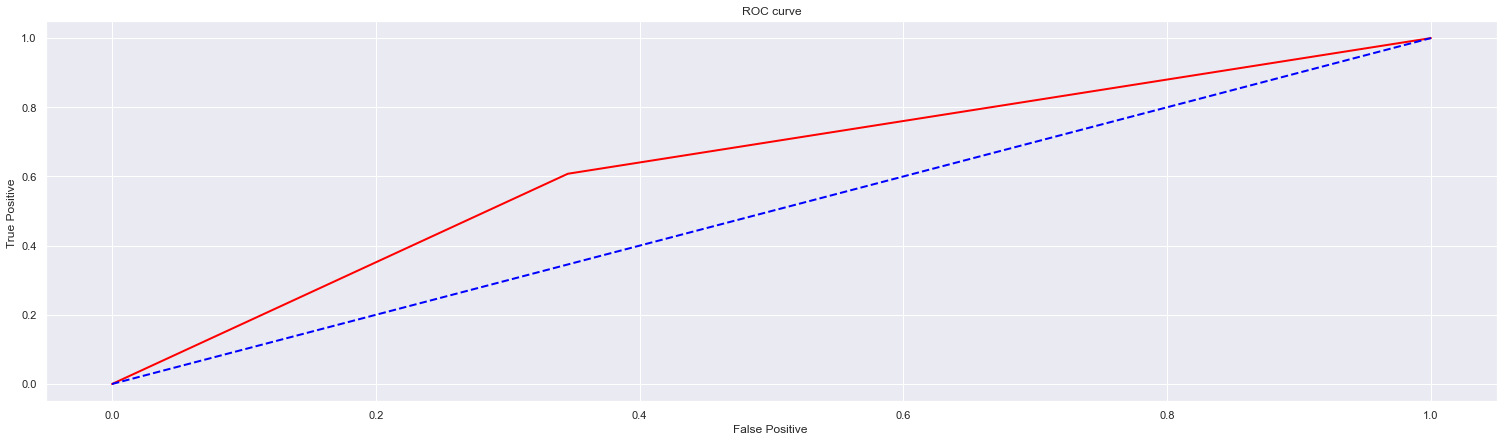

In [47]:
###Roc curve
fpr, tpr,_=roc_curve(lr.predict(X_train),Y_train,drop_intermediate=False)
import matplotlib.pyplot as plt
plt.figure()
plt.plot(fpr, tpr, color='red',
         lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
plt.xlabel('False Positive ')
plt.ylabel('True Positive ')
plt.title('ROC curve')
plt.show()

<AxesSubplot:xlabel='Diabetes'>

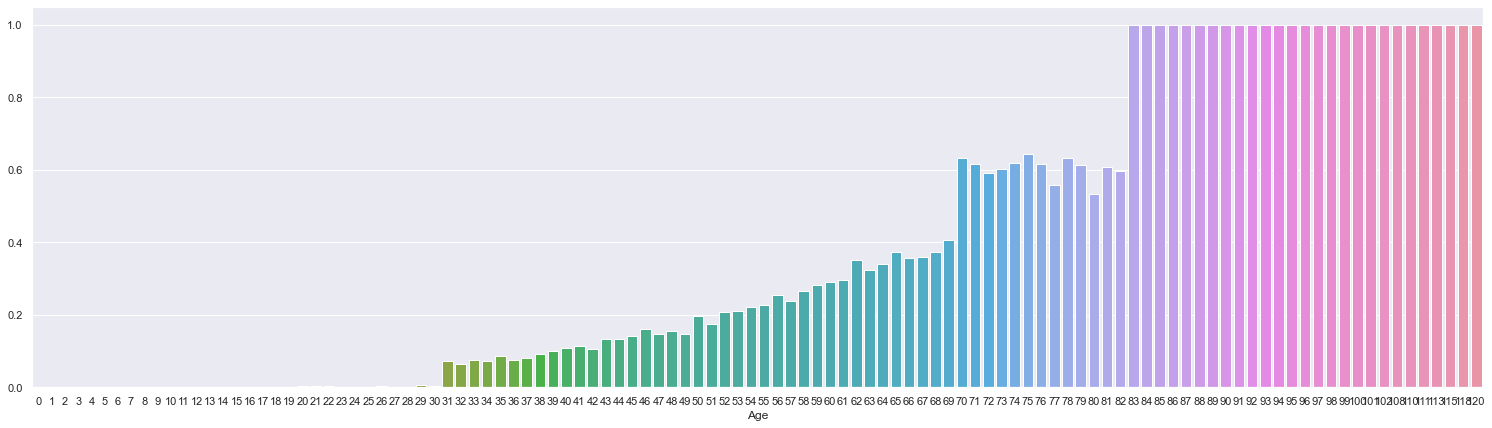

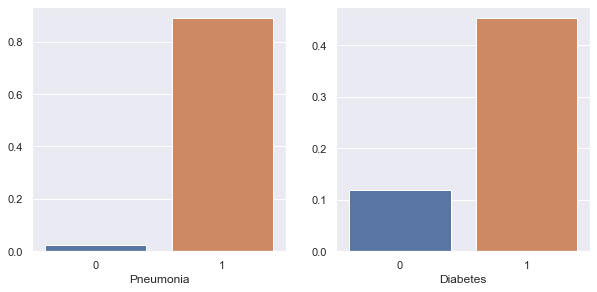

In [48]:
roc_auc_score(lr.predict(X_train),Y_train)
seaborn.set(rc={'figure.figsize':(26,7)})
k=seaborn.barplot(X_test['Age'],Y_pred_lr,ci=None)
seaborn.set(rc={'figure.figsize':(10,7)})
fig,ax_arr=plt.subplots(1,2,figsize=(10,4.5))
seaborn.barplot(X_test['Pneumonia'],Y_pred_lr,ci=None,ax=ax_arr[0])
seaborn.barplot(X_test['Diabetes'],Y_pred_lr,ci=None,ax=ax_arr[1])

### Method3: K nearest neighbors (sklearn version)

In [49]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train,Y_train)
Y_pred_knn=knn.predict(X_test)

In [50]:
accu_knn_sklearn = round(accuracy_score(Y_pred_knn,Y_test)*100,2)
print("The accuracy score of sklearn KNN: "+str(accu_knn_sklearn)+" %")

The accuracy score of sklearn KNN: 59.33 %


In [51]:
cm = confusion_matrix(Y_test, Y_pred_knn)
report = classification_report(Y_test, Y_pred_knn)
print(cm)
print(report)

[[34805 12899]
 [18992 11727]]
              precision    recall  f1-score   support

           0       0.65      0.73      0.69     47704
           1       0.48      0.38      0.42     30719

    accuracy                           0.59     78423
   macro avg       0.56      0.56      0.55     78423
weighted avg       0.58      0.59      0.58     78423



In [52]:
print("Precision Score : ",precision_score(Y_test,Y_pred_knn, pos_label='positive',average='micro'))
print("Recall Score : ",recall_score(Y_test,Y_pred_knn, pos_label='positive', average='micro'))

Precision Score :  0.5933463397217653
Recall Score :  0.5933463397217653


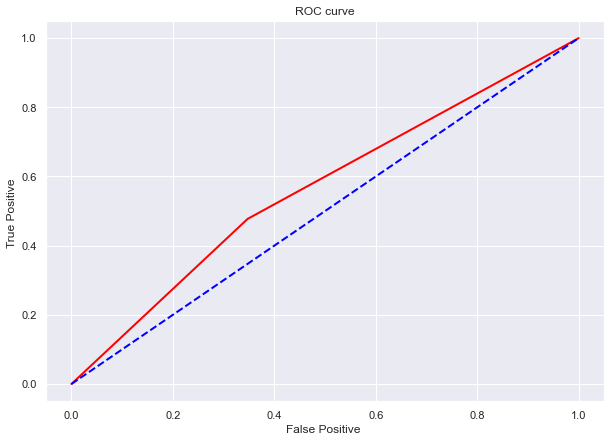

In [53]:
###Roc curve
fpr, tpr,_=roc_curve(knn.predict(X_train),Y_train,drop_intermediate=False)
import matplotlib.pyplot as plt
plt.figure()
plt.plot(fpr, tpr, color='red',
         lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
plt.xlabel('False Positive ')
plt.ylabel('True Positive ')
plt.title('ROC curve')
plt.show()

<AxesSubplot:xlabel='Diabetes'>

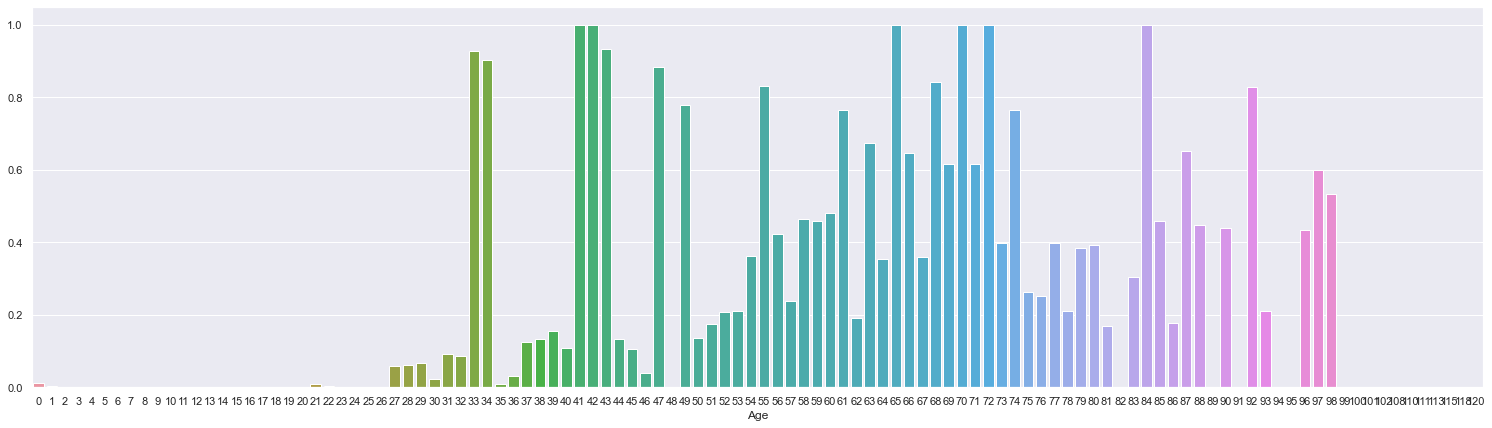

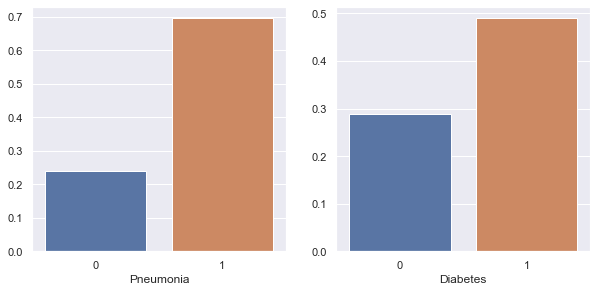

In [54]:
roc_auc_score(knn.predict(X_train),Y_train)
seaborn.set(rc={'figure.figsize':(26,7)})
k=seaborn.barplot(X_test['Age'],Y_pred_knn,ci=None)
seaborn.set(rc={'figure.figsize':(10,7)})
fig,ax_arr=plt.subplots(1,2,figsize=(10,4.5))
seaborn.barplot(X_test['Pneumonia'],Y_pred_knn,ci=None,ax=ax_arr[0])
seaborn.barplot(X_test['Diabetes'],Y_pred_knn,ci=None,ax=ax_arr[1])

### Method4: Bayes Network (our version)

start
The accuracy score achieved using Naive Bayes is: 63.1 %
[[38986  8718]
 [20222 10497]]
              precision    recall  f1-score   support

           0       0.66      0.82      0.73     47704
           1       0.55      0.34      0.42     30719

    accuracy                           0.63     78423
   macro avg       0.60      0.58      0.57     78423
weighted avg       0.61      0.63      0.61     78423

Precision Score :  0.6309756066460095
Recall Score :  0.6309756066460095
0.6309756066460095


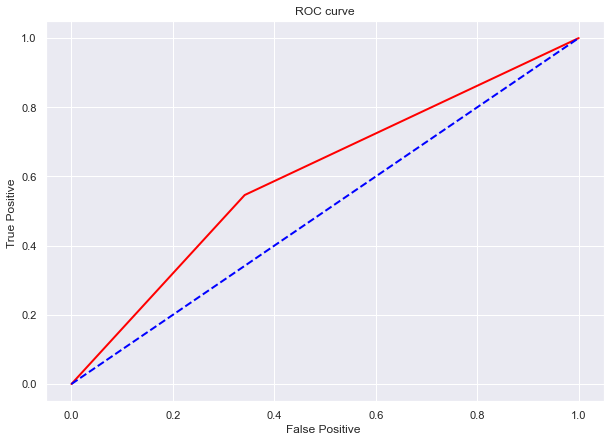

<AxesSubplot:xlabel='Diabetes'>

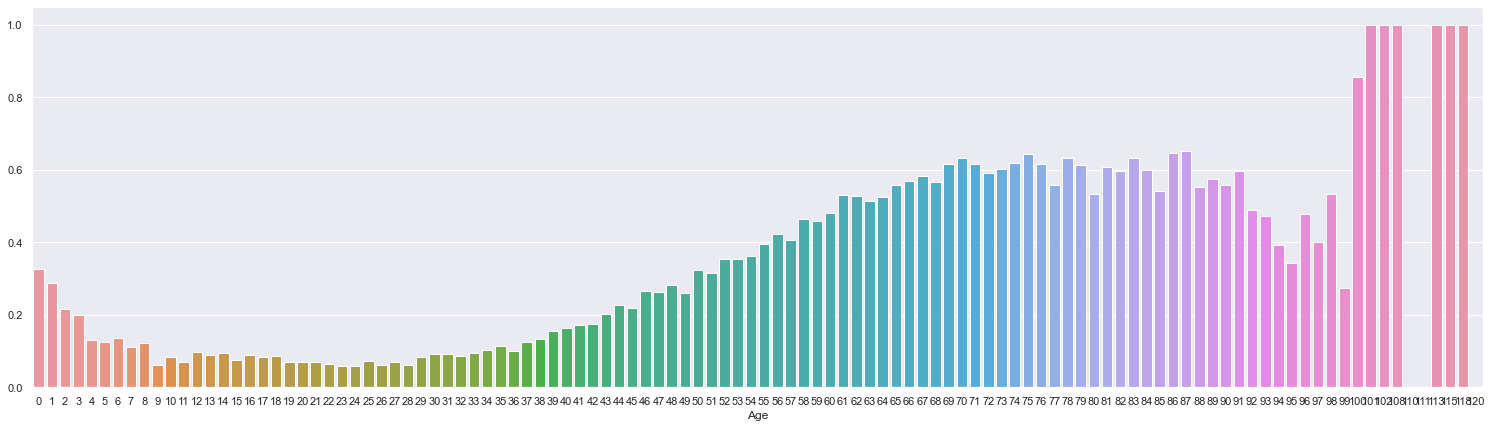

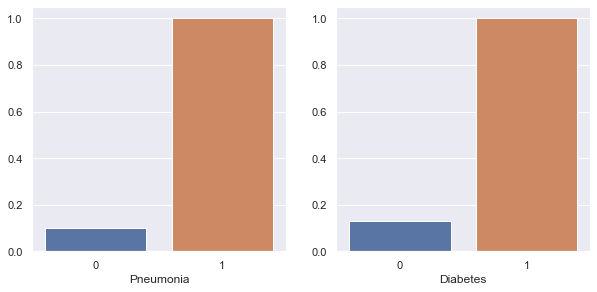

In [55]:
class NaiveBayes:
    def __init__(self):
        print('start')

    def prob(self, x_test, x):
        temp1 = (x_test-x.mean(0))*(x_test-x.mean(0))
        temp2 = x.std(0) * x.std(0)
        temp1.astype('float')
        temp2.astype('float')
        return np.exp(-temp1 / (2 * temp2)) / np.sqrt(2 * np.pi * temp2)

    def fit(self, x_train, y_train):
        self.x_train = x_train
        self.y_train = y_train

    def predict(self, x_test, y_test=None):
        self.classes = np.unique(np.concatenate([self.y_train, y_test], 0))
        # print(self.classes)
        pred_probs = []
        for i in self.classes:
            idx_i = self.y_train == i
            p_y = len(idx_i) / len(self.y_train)     
            p_x_y = np.prod(self.prob(x_test, self.x_train[idx_i]), 1)
            prob_i = p_y * p_x_y
            pred_probs.append(prob_i)
        pred_probs = np.vstack(pred_probs)
        label_idx = pred_probs.argmax(0)
        y_pred = self.classes[label_idx]
        if y_test is not None:
            self._score(y_test, y_pred)
        return y_pred
    def _score(self, y_test, y_pred):
        self.score = np.count_nonzero(y_test == y_pred)/len(y_test)
X = NaiveBayes()
X.fit(x_train,Y_train)
Y_pred_nb=X.predict(x_test,Y_test)
accu_bayes_our=X.score
print("The accuracy score achieved using Naive Bayes is: "+str(round(X.score*100,2))+" %")
cm = confusion_matrix(Y_test, Y_pred_nb)
report = classification_report(Y_test, Y_pred_nb)
print(cm)
print(report)
print("Precision Score : ",precision_score(Y_test,Y_pred_nb, pos_label='positive', average='micro'))
print("Recall Score : ",recall_score(Y_test,Y_pred_nb, pos_label='positive', average='micro'))
print(f1_score(Y_test,Y_pred_nb,average='micro'))

fpr, tpr,_=roc_curve(Y_pred_nb,Y_test,drop_intermediate=False)
import matplotlib.pyplot as plt
plt.figure()
plt.plot(fpr, tpr, color='red',
         lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
plt.xlabel('False Positive ')
plt.ylabel('True Positive ')
plt.title('ROC curve')
plt.show()
seaborn.set(rc={'figure.figsize':(26,7)})
k=seaborn.barplot(X_test['Age'],Y_pred_nb,ci=None)
seaborn.set(rc={'figure.figsize':(10,7)})
fig,ax_arr=plt.subplots(1,2,figsize=(10,4.5))
seaborn.barplot(X_test['Pneumonia'],Y_pred_nb,ci=None,ax=ax_arr[0])
seaborn.barplot(X_test['Diabetes'],Y_pred_nb,ci=None,ax=ax_arr[1])

quite good!

### Method5: Naive Bayes (sklearn version)

In [56]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train,Y_train)
Y_pred_nb = nb.predict(X_test)

In [57]:
accu_bayes_sklearn = round(accuracy_score(Y_pred_nb,Y_test)*100,2)
print("The accuracy score achieved using Naive Bayes is: "+str(accu_bayes_sklearn)+" %")

The accuracy score achieved using Naive Bayes is: 63.11 %


In [58]:
cm = confusion_matrix(Y_test, Y_pred_nb)
report = classification_report(Y_test, Y_pred_nb)
print(cm)
print(report)

[[38998  8706]
 [20227 10492]]
              precision    recall  f1-score   support

           0       0.66      0.82      0.73     47704
           1       0.55      0.34      0.42     30719

    accuracy                           0.63     78423
   macro avg       0.60      0.58      0.57     78423
weighted avg       0.61      0.63      0.61     78423



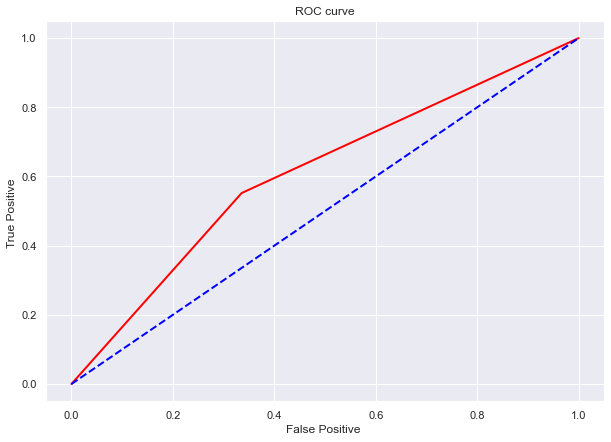

In [59]:
###Roc curve
fpr, tpr,_=roc_curve(nb.predict(X_train),Y_train,drop_intermediate=False)
import matplotlib.pyplot as plt
plt.figure()
plt.plot(fpr, tpr, color='red',
         lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
plt.xlabel('False Positive ')
plt.ylabel('True Positive ')
plt.title('ROC curve')
plt.show()

<AxesSubplot:xlabel='Diabetes'>

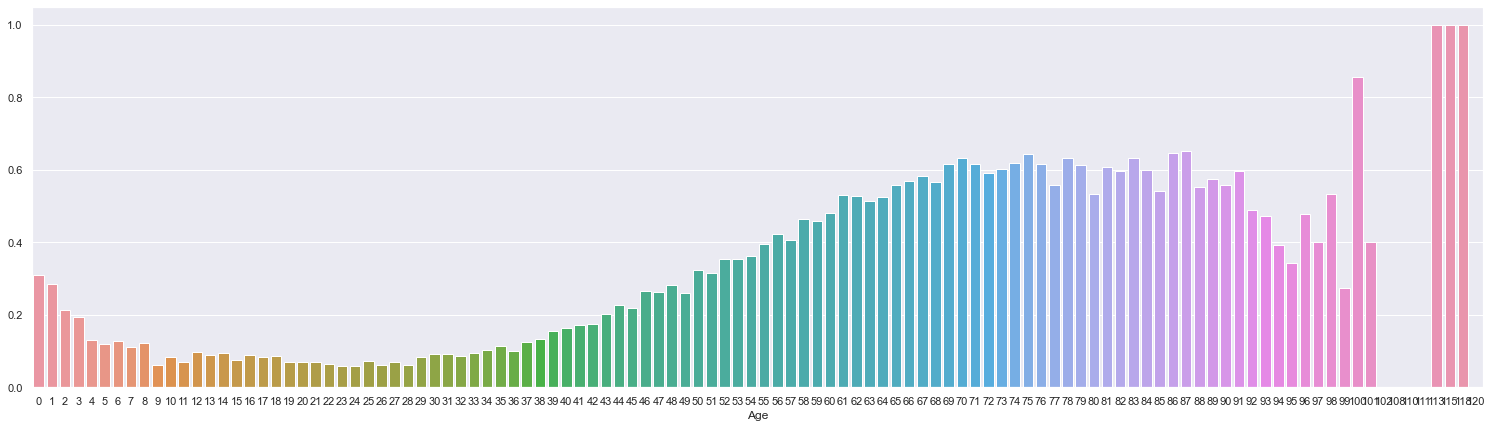

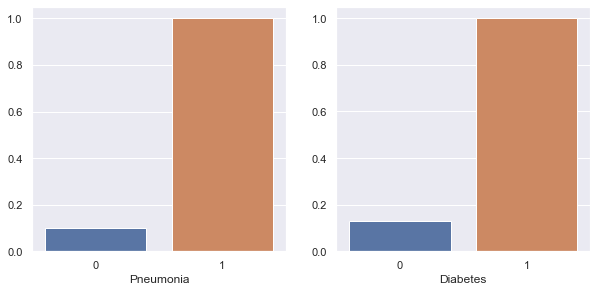

In [60]:
roc_auc_score(nb.predict(X_train),Y_train)
seaborn.set(rc={'figure.figsize':(26,7)})
k=seaborn.barplot(X_test['Age'],Y_pred_nb,ci=None)
seaborn.set(rc={'figure.figsize':(10,7)})
fig,ax_arr=plt.subplots(1,2,figsize=(10,4.5))
seaborn.barplot(X_test['Pneumonia'],Y_pred_nb,ci=None,ax=ax_arr[0])
seaborn.barplot(X_test['Diabetes'],Y_pred_nb,ci=None,ax=ax_arr[1])

### Method6: Decision Tree

### Our version

[[11680 36024]
 [10791 19928]]
              precision    recall  f1-score   support

           0       0.52      0.24      0.33     47704
           1       0.36      0.65      0.46     30719

    accuracy                           0.40     78423
   macro avg       0.44      0.45      0.40     78423
weighted avg       0.46      0.40      0.38     78423

Precision Score :  0.40304502505642475
Recall Score :  0.40304502505642475
0.4030450250564248


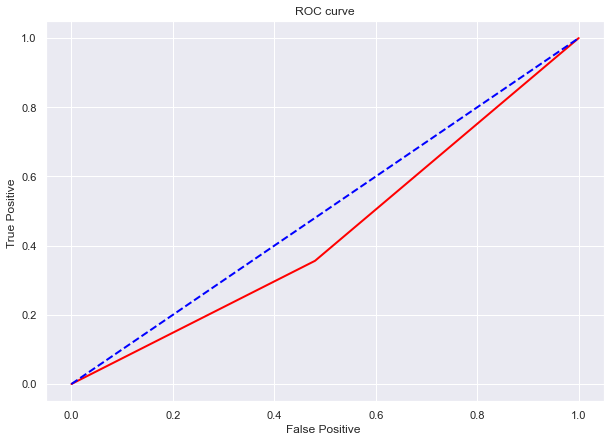

In [61]:
import random
class Node:
    def __init__(self, key,father=None):
        self.key=key
        self.right = None
        self.left=None
        self.father=father
        self.result=None
        self.w=None
        self.test=None

    def insert(self, key,dir,type):
        if dir=='left':
            self.left=Node(key)
            self.left.father=self
            self.left.result=type
            return self.left
        else:
            self.right=Node(key)
            self.right.father=self
            self.right.result=type
            return self.right
    
    def depth(self):
        n=0
        return(self.dp(n))
    
    def dp(self,n):
        if(self.father==None):
            return n+1
        return self.father.dp(n+1)

    def isleaf(self):
        return self.right==None and self.left==None

                
    def sep_(self,tag):
        self.w=tag
        if tag[0] not in self.key.columns:
            return None
        sort_temp=self.key.sort_values(by=tag[0])
        if(tag[1]=='d'):
            tmp1_key=sort_temp.iloc[:tag[3],:].drop(columns=[tag[0]])
            tmp2_key=sort_temp.iloc[tag[3]:,:].drop(columns=[tag[0]])
        else:
            tmp1_key=sort_temp.iloc[:tag[3],:]
            tmp2_key=sort_temp.iloc[tag[3]:,:]
        a=None
        b=None
        if tmp1_key.empty==False:
            a=self.insert(tmp1_key,'left',tag[-2])
        if tmp2_key.empty==False:
            b=self.insert(tmp2_key,'right',tag[-1])
        return [a,b]

    def dfs(self):
        if self.isleaf():
            print(self.key.shape)
        if(self.left!=None):
            self.left.dfs()
        if(self.right!=None):
            self.right.dfs()
    def dfs_l(self):
        error=0
        return self.dfs_leaf(error)

    def dfs_leaf(self,error):
        if(self.isleaf()):
            a=abs(self.result*self.key.shape[0]-np.sum(self.key['Result']))
            error+=a
            return error
        if(self.right==None):
            return self.left.dfs_leaf(error)
        elif(self.left==None):
            return self.right.dfs_leaf(error)
        else:
            return self.left.dfs_leaf(error)+self.right.dfs_leaf(error)
        
    def y_pred(self):
        st=[]
        y_pred=pd.DataFrame(columns=self.key.columns)
        y_real=pd.DataFrame(columns=self.key.columns)
        st.append(self)
        while(len(st)>0):
            a=st.pop()
            if a.isleaf():
                y_real=pd.concat([y_real,a.key])
                if a.result==0:
                    a.key['Result']=np.zeros(a.key.shape[0])
                else:
                    a.key['Result']=np.ones(a.key.shape[0])
                y_pred=pd.concat([y_pred,a.key])
            if a.left:
                st.append(a.left)
            if a.right:
                st.append(a.right)
        return y_pred['Result'].astype('int'),y_real['Result'].astype('int')

class Tree:
    def __init__(self, train_data, train_target, test_data, test_target):
        train_data=pd.DataFrame(train_data)
        train_target=pd.DataFrame(train_target)
        test_data=pd.DataFrame(test_data)
        test_target=pd.DataFrame(test_target)
        self.train=pd.concat([train_data,train_target],axis=1)
        self.test=pd.concat([test_data,test_target],axis=1)
        self.y_pred=None
        self.loss=0
        self.root=Node(self.train)
        
        self.pure_calc(self.root)

    def traversal(self,node):
        s=[]
        self.preorder(node,s);
        return s

    def preorder(self,node, s):
        if(node == None):
            return
        s.push_back(node.key)
        self.preorder(node.left,s)
        self.preorder(node.right,s)

    def pure_calc(self,node):
        l=node.key.shape[0]
        tmp=list(node.key['Result']).count(0)
        if tmp==0 or tmp==l:
            return None
        info_d=-tmp/l*np.log2(tmp/l)-(1-tmp/l)*np.log2(1-tmp/l)
        tag_l=[] #[tag,'c',midvalue,j,igr,temp10112021]
        sort_temp={}
        for i in node.key.columns:
            if i!='Result':
                sort_temp[i]=node.key.sort_values(by=str(i))
                if i=='Age':
                    for k in range(1,1000):
                        j=random.randint(1,l-1)
                        mid=0.5*(sort_temp[i][i].iloc[j-1]+sort_temp[i][i].iloc[j])
                        tag_l.append([i,'c',mid,j])
                else:
                    t=list(node.key[i]).count(0)
                    tag_l.append([i,'d',0.5,t])
        
        for i,tag in enumerate(tag_l):

            #条件熵
            temp_1=sort_temp[tag[0]].iloc[:tag[3],:]
            temp_2=sort_temp[tag[0]].iloc[tag[3]:,:]
            temp_1_num=tag[3]
            temp_2_num=l-tag[3]
            temp_1_0=list(temp_1['Result']).count(0)
            temp_1_1=temp_1_num-temp_1_0
            temp_1_result=0 if temp_1_0>=temp_1_1 else 1
            temp_2_0=list(temp_2['Result']).count(0)
            temp_2_1=temp_2_num-temp_2_0
            temp_2_result=0 if temp_2_0>temp_2_1 else 1
            eps=0.0001
            if(temp_1_0==0):
                temp_1_0=eps
            if(temp_1_1==0):
                temp_1_1=eps
            if(temp_2_0==0):
                temp_2_0=eps
            if(temp_2_1==0):
                temp_2_1=eps
            if(temp_1_0==temp_1_num):
                temp_1_0-=eps
            if(temp_1_1==temp_1_num):
                temp_1_1-=eps
            if(temp_2_0==temp_2_num):
                temp_2_0-=eps
            if(temp_2_1==temp_2_num):
                temp_2_1-=eps
            if(temp_2_num!=0 and temp_1_num!=0):
                info_=temp_1_num/l*  \
                    (-temp_1_0/temp_1_num*np.log2(temp_1_0/temp_1_num)-temp_1_1/temp_1_num*np.log2(temp_1_1/temp_1_num))\
                        +\
                            temp_2_num/l*  \
                    (-temp_2_0/temp_2_num*np.log2(temp_2_0/temp_2_num)-temp_2_1/temp_2_num*np.log2(temp_2_1/temp_2_num))
            elif(temp_1_num==0):
                info_=temp_2_num/l*  \
                    (-temp_2_0/temp_2_num*np.log2(temp_2_0/temp_2_num)-temp_2_1/temp_2_num*np.log2(temp_2_1/temp_2_num))
            else:
                info_=temp_1_num/l*  \
                    (-temp_1_0/temp_1_num*np.log2(temp_1_0/temp_1_num)-temp_1_1/temp_1_num*np.log2(temp_1_1/temp_1_num))
            gain_=info_d-info_
            #分裂信息度量
            if tag[3]==0:
                tmp3=eps
            elif tag[3]==l:
                tmp3=tag[3]-eps
            else:
                tmp3=tag[3]
            h_=-tmp3/l*np.log2(tmp3/l)-(1-tmp3/l)*np.log2(1-tmp3/l)
            igr_=gain_/h_
            tag_l[i].append(igr_)
            tag_l[i].append(temp_1_result)
            tag_l[i].append(temp_2_result)
        if(len(tag_l))==0:
            return None
        c=sorted(tag_l,key=lambda x:x[4])
        b=c[-1]
        return b

    

    def make_tree(self):
        st=[]
        st.append(self.root)
        self.tag_w=[]
        while(len(st)>0):
            curr_node=st.pop(0)
            if(curr_node.key.shape[0]>1):
                f=self.pure_calc(curr_node)
                if(f):
                    self.tag_w.append(f)
                    t=curr_node.sep_(f)
                    curr_node.w=f
                    if curr_node.depth()>9:
                        break
                    if t!=None:
                        if(t[0]!=None):
                            st.append(t[0])
                        if(t[1]!=None):
                            st.append(t[1])

    def test1(self):
        self.root_test=Node(self.test)
        st=[]
        st_=[]
        st_.append(self.root_test)
        st.append(self.root)
        while(len(st)>0):
            node=st.pop()
            node_test=st_.pop()
            if node.left!=None:
                st.append(node.left)
            if node.right!=None:
                st.append(node.right)
            w=node.w
            if w:
                t=node_test.sep_(w)
            if t!=None:
                if(t[0]!=None):
                    st_.append(t[0])
                if(t[1]!=None):
                    st_.append(t[1])
        return self.root_test


t=Tree(X_train,Y_train,X_test,Y_test)
t.make_tree()
y_p,y_r=t.test1().y_pred()
accu_dt_our=np.count_nonzero(y_p == y_r)/len(y_r)
cm = confusion_matrix(y_r, y_p)
report = classification_report(y_r, y_p)
print(cm)
print(report)
print("Precision Score : ",precision_score(y_r,y_p, 
                                           pos_label='positive',
                                           average='micro'))
print("Recall Score : ",recall_score(y_r,y_p, 
                                           pos_label='positive',
                                           average='micro'))
print(f1_score(y_r,y_p,average='micro'))
fpr, tpr,_=roc_curve(y_p,y_r,drop_intermediate=False)
plt.figure()
plt.plot(fpr, tpr, color='red',
         lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
plt.xlabel('False Positive ')
plt.ylabel('True Positive ')
plt.title('ROC curve')
plt.show()

### sklearn version

In [62]:
from sklearn.tree import DecisionTreeClassifier

max_accuracy = 0
for x in range(200):
    dt = DecisionTreeClassifier(random_state=x)
    dt.fit(X_train,Y_train)
    Y_pred_dt = dt.predict(X_test)
    current_accuracy = round(accuracy_score(Y_pred_dt,Y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x
        
#print(max_accuracy)
#print(best_x)


dt = DecisionTreeClassifier(random_state=best_x)
dt.fit(X_train,Y_train)
Y_pred_dt = dt.predict(X_test)
accu_dt = round(accuracy_score(Y_pred_dt,Y_test)*100,2)

print("The accuracy score achieved using Decision Tree is: "+str(accu_dt)+" %")

The accuracy score achieved using Decision Tree is: 64.35 %


In [63]:
cm = confusion_matrix(Y_test, Y_pred_dt)
report = classification_report(Y_test, Y_pred_dt)
print(cm)
print(report)

[[42662  5042]
 [22912  7807]]
              precision    recall  f1-score   support

           0       0.65      0.89      0.75     47704
           1       0.61      0.25      0.36     30719

    accuracy                           0.64     78423
   macro avg       0.63      0.57      0.56     78423
weighted avg       0.63      0.64      0.60     78423



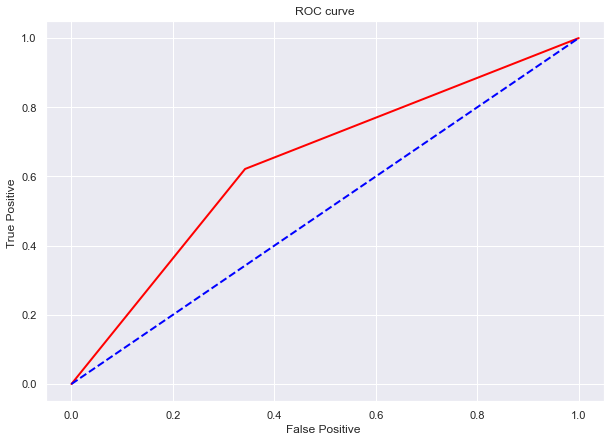

In [64]:
###Roc curve
fpr, tpr,_=roc_curve(dt.predict(X_train),Y_train,drop_intermediate=False)
import matplotlib.pyplot as plt
plt.figure()
plt.plot(fpr, tpr, color='red',
         lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
plt.xlabel('False Positive ')
plt.ylabel('True Positive ')
plt.title('ROC curve')
plt.show()

<AxesSubplot:xlabel='Diabetes'>

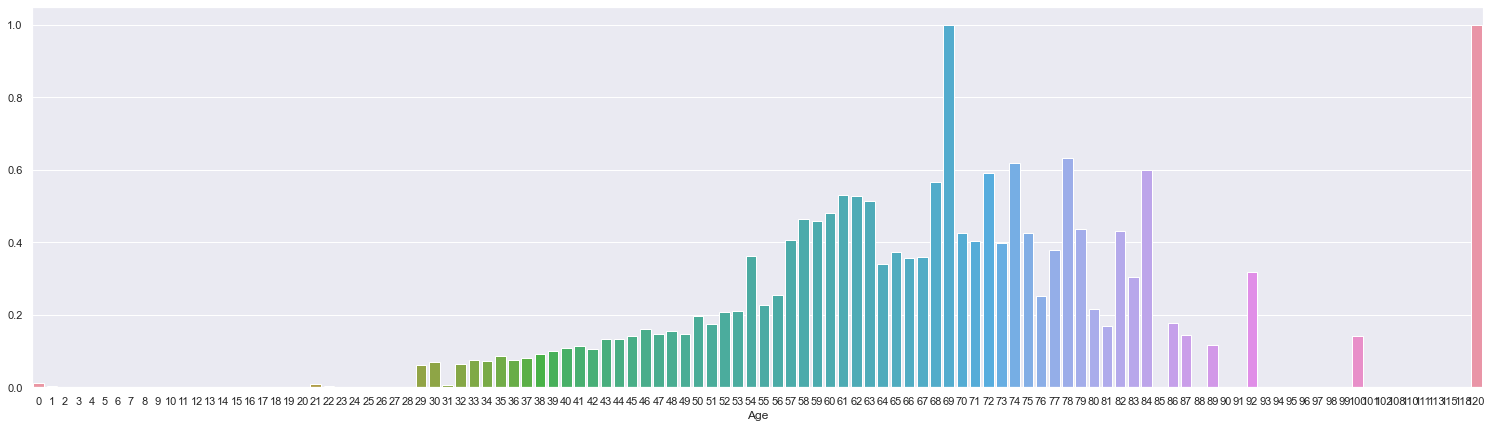

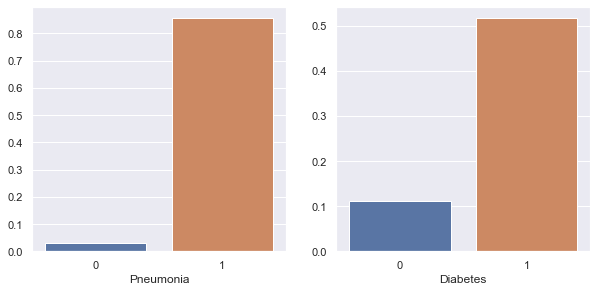

In [65]:
roc_auc_score(dt.predict(X_train),Y_train)
seaborn.set(rc={'figure.figsize':(26,7)})
k=seaborn.barplot(X_test['Age'],Y_pred_dt,ci=None)
seaborn.set(rc={'figure.figsize':(10,7)})
fig,ax_arr=plt.subplots(1,2,figsize=(10,4.5))
seaborn.barplot(X_test['Pneumonia'],Y_pred_dt,ci=None,ax=ax_arr[0])
seaborn.barplot(X_test['Diabetes'],Y_pred_dt,ci=None,ax=ax_arr[1])

### Method7: SVM 

The accuracy score achieved using SVM is: 64.1%


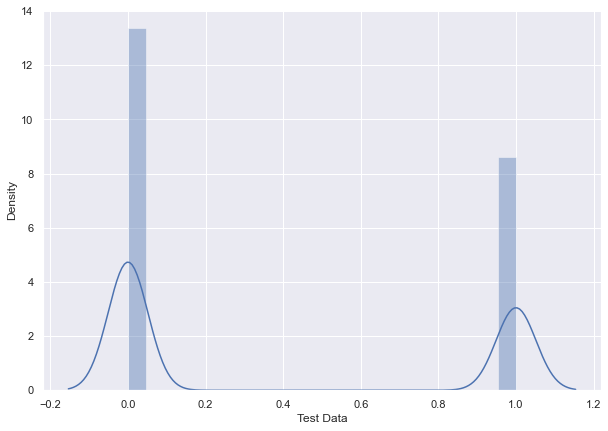

In [66]:
from sklearn import svm
from sklearn.svm import LinearSVC

linear_svc = LinearSVC()
linear_svc.fit(x_train, Y_train)
x = pd.Series(Y_test, name="Test Data")
ax = seaborn.distplot(x)
Y_pred_svm = linear_svc.predict(x_test)
accu_svm = round(accuracy_score(Y_pred_svm, Y_test) * 100, 2)
print("The accuracy score achieved using SVM is: " +str(accu_svm)+ "%")

In [67]:
cm = confusion_matrix(Y_test, Y_pred_svm)
report = classification_report(Y_test, Y_pred_svm)
print(cm)
print(report)

[[42633  5071]
 [23082  7637]]
              precision    recall  f1-score   support

           0       0.65      0.89      0.75     47704
           1       0.60      0.25      0.35     30719

    accuracy                           0.64     78423
   macro avg       0.62      0.57      0.55     78423
weighted avg       0.63      0.64      0.60     78423



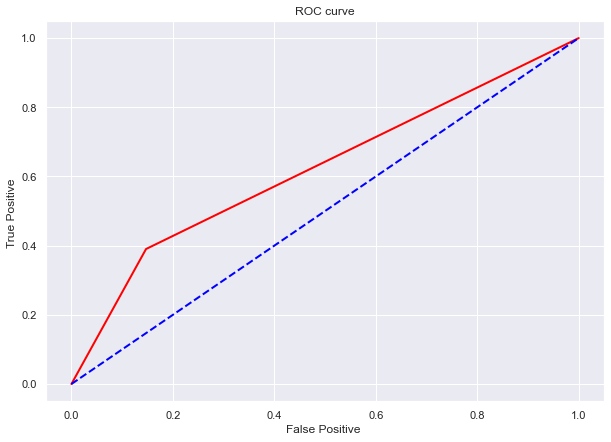

In [68]:
###Roc curve
fpr, tpr,_=roc_curve(linear_svc.predict(X_train),Y_train,drop_intermediate=False)
import matplotlib.pyplot as plt
plt.figure()
plt.plot(fpr, tpr, color='red',
         lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
plt.xlabel('False Positive ')
plt.ylabel('True Positive ')
plt.title('ROC curve')
plt.show()

<AxesSubplot:xlabel='Diabetes'>

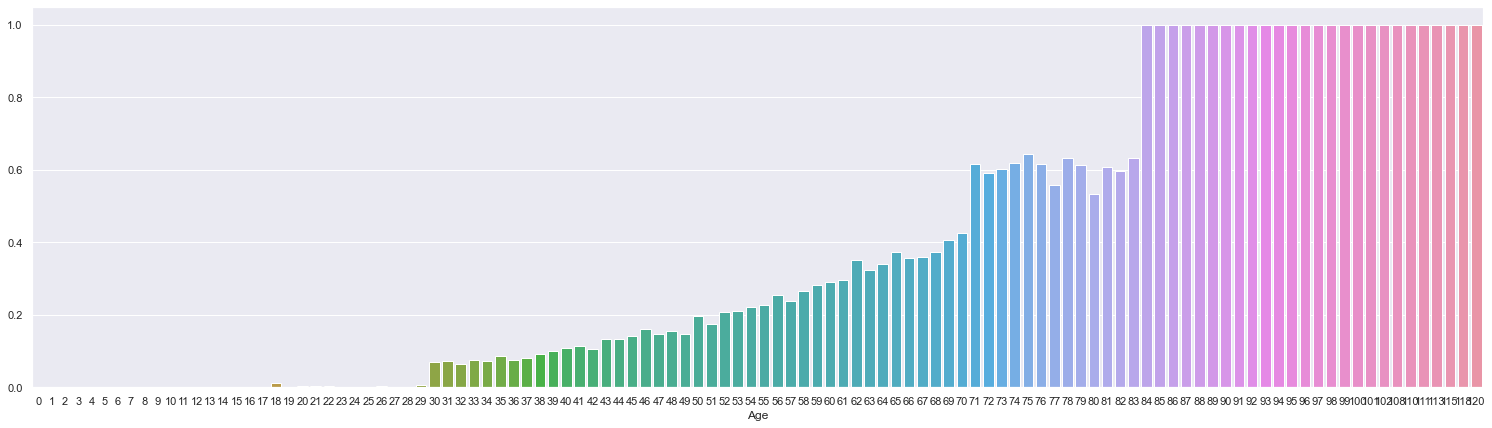

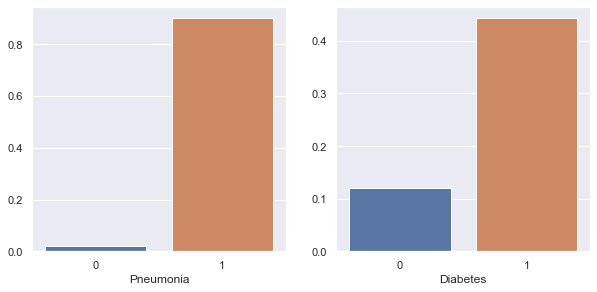

In [69]:
roc_auc_score(linear_svc.predict(X_train),Y_train)
seaborn.set(rc={'figure.figsize':(26,7)})
k=seaborn.barplot(X_test['Age'],Y_pred_svm,ci=None)
seaborn.set(rc={'figure.figsize':(10,7)})
fig,ax_arr=plt.subplots(1,2,figsize=(10,4.5))
seaborn.barplot(X_test['Pneumonia'],Y_pred_svm,ci=None,ax=ax_arr[0])
seaborn.barplot(X_test['Diabetes'],Y_pred_svm,ci=None,ax=ax_arr[1])

### Method8: Neural Network using Multilayer Perceptron (our modified version)

In [70]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import Adam

In [71]:
model = Sequential()
# Add the first hidden layer
model.add(Dense(32, activation='relu', input_dim=3))
# Add the second hidden layer
model.add(Dense(16, activation='relu'))
# Add the output layer
model.add(Dense(1, activation='sigmoid'))

In [72]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                128       
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 1)                 17        
                                                                 
Total params: 673
Trainable params: 673
Non-trainable params: 0
_________________________________________________________________
None


In [73]:
# Model Compilation 
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [74]:
# Train the model for 10 epochs
model.fit(x_train, Y_train, epochs=10)

Epoch 1/10
5719/5719 [==============================] - 15s 2ms/step - loss: 0.6380 - accuracy: 0.6486
Epoch 2/10
5719/5719 [==============================] - 14s 3ms/step - loss: 0.6365 - accuracy: 0.6497
Epoch 3/10
5719/5719 [==============================] - 14s 2ms/step - loss: 0.6364 - accuracy: 0.6499
Epoch 4/10
5719/5719 [==============================] - 13s 2ms/step - loss: 0.6363 - accuracy: 0.6500
Epoch 5/10
5719/5719 [==============================] - 13s 2ms/step - loss: 0.6362 - accuracy: 0.6508
Epoch 6/10
5719/5719 [==============================] - 13s 2ms/step - loss: 0.6362 - accuracy: 0.6504
Epoch 7/10
5719/5719 [==============================] - 13s 2ms/step - loss: 0.6362 - accuracy: 0.6502
Epoch 8/10
5719/5719 [==============================] - 13s 2ms/step - loss: 0.6362 - accuracy: 0.6502
Epoch 9/10
5719/5719 [==============================] - 13s 2ms/step - loss: 0.6361 - accuracy: 0.6503
Epoch 10/10
5719/5719 [==============================] - 13s 2ms/step - l

In [75]:
# Testing accuracy
scores_nn_train = model.evaluate(x_train, Y_train)
print("Training Accuracy: %.2f%%\n" % (scores_nn_train[1]*100))
accu_nn = model.evaluate(x_test, Y_test)
print("Testing Accuracy: %.2f%% \n" % (accu_nn[1]*100))
Y_pred_nn = model.predict(x_test)
Y_pred_nn = [round(x[0]) for x in Y_pred_nn]
acc_logreg_nn = round(accuracy_score(Y_pred_nn, Y_test) * 100, 2)
print("The accuracy score achieved using Neural Network is: " +str(acc_logreg_nn)+ "%")

5719/5719 [==============================] - 10s 2ms/step - loss: 0.6358 - accuracy: 0.6503
Training Accuracy: 65.03%

2451/2451 [==============================] - 4s 2ms/step - loss: 0.6395 - accuracy: 0.6435
Testing Accuracy: 64.35% 

2451/2451 [==============================] - 4s 1ms/step
The accuracy score achieved using Neural Network is: 64.35%


2451/2451 [==============================] - 3s 1ms/step


Text(66.453125, 0.5, 'Actual')

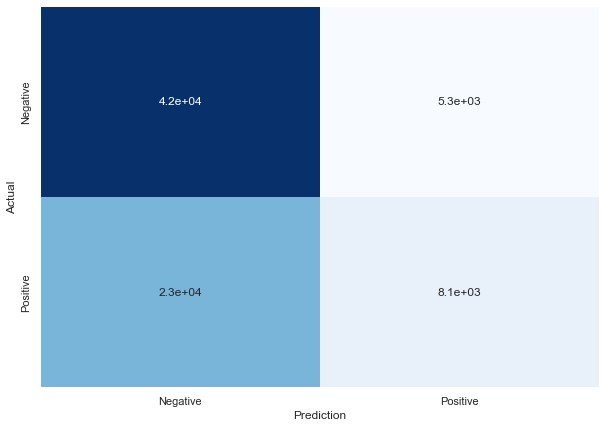

In [76]:
# Confusion matrix
Y_test_pred = (model.predict(x_test) > 0.5).astype("int8")
c_matrix = confusion_matrix(Y_test, Y_test_pred)
ax = seaborn.heatmap(c_matrix, annot=True,
                 xticklabels=['Negative', 'Positive'],
                 yticklabels=['Negative', 'Positive'],
                 cbar=False, cmap='Blues')
ax.set_xlabel("Prediction")
ax.set_ylabel("Actual")

In [77]:
cm = confusion_matrix(Y_test, Y_pred_nn)
report = classification_report(Y_test, Y_pred_nn)
print(cm)
print(report)

[[42367  5337]
 [22619  8100]]
              precision    recall  f1-score   support

           0       0.65      0.89      0.75     47704
           1       0.60      0.26      0.37     30719

    accuracy                           0.64     78423
   macro avg       0.63      0.58      0.56     78423
weighted avg       0.63      0.64      0.60     78423



2451/2451 [==============================] - 5s 2ms/step


Text(0, 0.5, 'True Positive Rate')

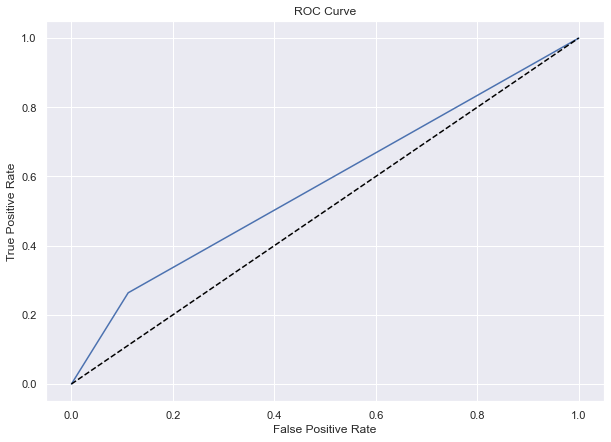

In [78]:
Y_test_pred_probs= (model.predict(x_test) > 0.5).astype("int32")

FPR, TPR, _ = roc_curve(Y_test, Y_test_pred_probs)

plt.plot(FPR, TPR)
plt.plot([0,1],[0,1],'--',color = 'black')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')


<AxesSubplot:xlabel='Diabetes'>

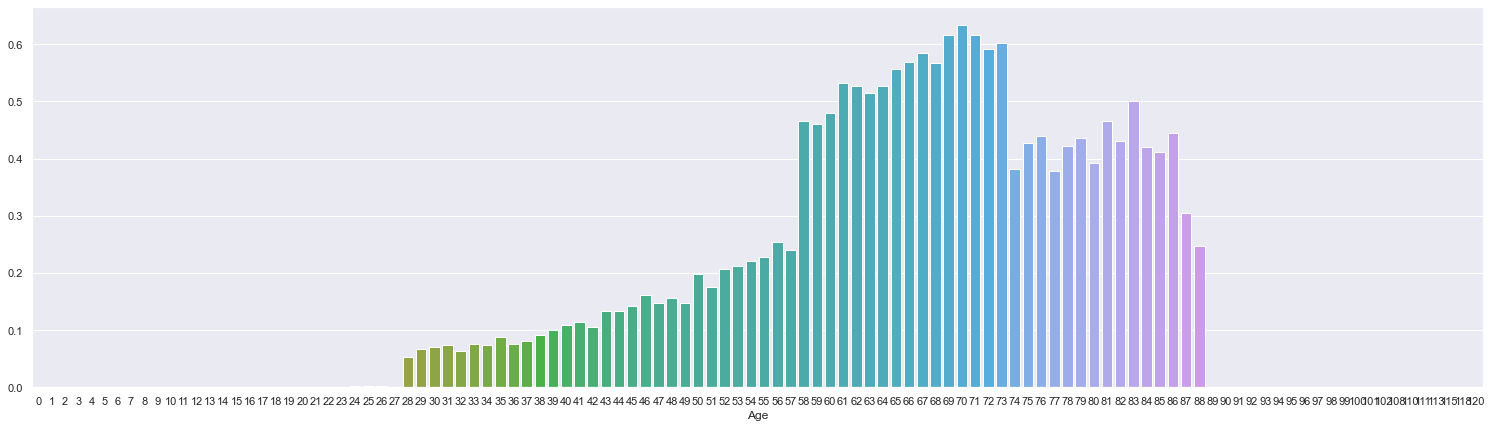

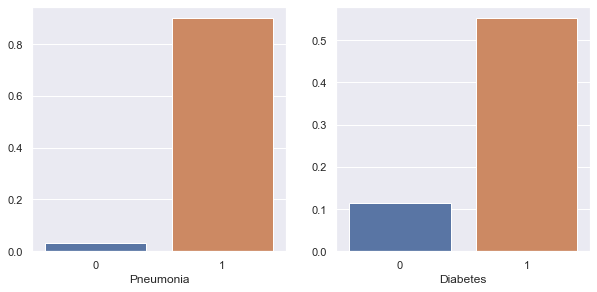

In [79]:
seaborn.set(rc={'figure.figsize':(26,7)})
k=seaborn.barplot(X_test['Age'],Y_pred_nn,ci=None)
seaborn.set(rc={'figure.figsize':(10,7)})
fig,ax_arr=plt.subplots(1,2,figsize=(10,4.5))
seaborn.barplot(X_test['Pneumonia'],Y_pred_nn,ci=None,ax=ax_arr[0])
seaborn.barplot(X_test['Diabetes'],Y_pred_nn,ci=None,ax=ax_arr[1])

### Part4: Comparison

In [80]:
Accuracy =    [accu_knn_our*100,
            accu_knn_sklearn,
            accu_logistic,
            accu_dt,
            accu_dt_our*100,
            accu_bayes_our*100,
            accu_bayes_sklearn,
            accu_svm,
            accu_nn[1]*100]
algorithms =    ["KNN(our)",
                "KNN(sklearn)",
                "Logistic Regression(Modified)",
                "Decision Tree(sklearn)",
                "Decision Tree(our)",
                "Bayes Network(our)",
                "Bayes Network(sklearn)",
                "Support Vector Machine(sklearn)",
                "Neural Network(our)"]    
algorithms_df = pd.DataFrame(columns = algorithms)

for i in range(len(algorithms)):
    print("The accuracy score achieved using "+algorithms[i]+" is: "+str(Accuracy[i])+" %")

The accuracy score achieved using KNN(our) is: 57.95876209785394 %
The accuracy score achieved using KNN(sklearn) is: 59.33 %
The accuracy score achieved using Logistic Regression(Modified) is: 64.06 %
The accuracy score achieved using Decision Tree(sklearn) is: 64.35 %
The accuracy score achieved using Decision Tree(our) is: 40.304502505642475 %
The accuracy score achieved using Bayes Network(our) is: 63.09756066460095 %
The accuracy score achieved using Bayes Network(sklearn) is: 63.11 %
The accuracy score achieved using Support Vector Machine(sklearn) is: 64.1 %
The accuracy score achieved using Neural Network(our) is: 64.35229182243347 %


In [81]:
df_output = df = pd.DataFrame( {'Algorithms':algorithms,'Accuracy (%)':Accuracy} )
df_output

,Algorithms,Accuracy (%)
0,KNN(our),57.958762
1,KNN(sklearn),59.330000
2,Logistic Regression(Modified),64.060000
3,Decision Tree(sklearn),64.350000
4,Decision Tree(our),40.304503
5,Bayes Network(our),63.097561
6,Bayes Network(sklearn),63.110000
7,Support Vector Machine(sklearn),64.100000
8,Neural Network(our),64.352292


<AxesSubplot:xlabel='Algorithms', ylabel='Accuracy (%)'>

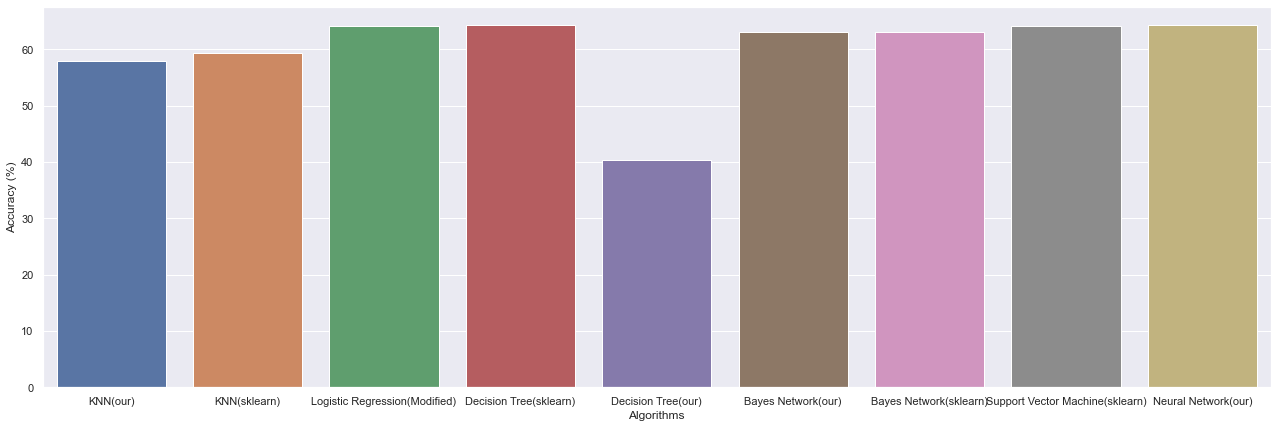

In [82]:
seaborn.set(rc={'figure.figsize':(22,7)})
seaborn.barplot(x="Algorithms", y="Accuracy (%)",data = df_output)